In [1]:
import pandas as pd
file = "FoodAccessResearchAtlasData.csv"
whole_set = pd.read_csv(file)
whole_db = pd.DataFrame(whole_set)
whole_db.head()

CensusTract    State          County  Urban  Pop2010  OHU2010  \
0   1001020100  Alabama  Autauga County      1     1912      693   
1   1001020200  Alabama  Autauga County      1     2170      743   
2   1001020300  Alabama  Autauga County      1     3373     1256   
3   1001020400  Alabama  Autauga County      1     4386     1722   
4   1001020500  Alabama  Autauga County      1    10766     4082   

   GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
0                  0       0.0      0.00                  0  ...   
1                  0     181.0      8.34                  1  ...   
2                  0       0.0      0.00                  0  ...   
3                  0       0.0      0.00                  0  ...   
4                  0     181.0      1.68                  0  ...   

   TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
0         221.0      1622.0       217.0        14.0         0.0       14.0   
1         214.0       888.0      1217.0         5.0         0.0        5.0   
2         439.0      2576.0       647.0        17.0         5.0       11.0   
3         904.0      4086.0       193.0        18.0         4.0       11.0   
4        1126.0      8666.0      1437.0       296.0         9.0       48.0   

   TractOMultir  TractHispanic  TractHUNV  TractSNAP  
0          45.0           44.0        6.0      102.0  
1          55.0           75.0       89.0      156.0  
2         117.0           87.0       99.0      172.0  
3          74.0           85.0       21.0       98.0  
4         310.0          355.0      230.0      339.0  

[5 rows x 147 columns]

In [2]:
columns =whole_db.columns.tolist()
columns

['CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

In [4]:
data_df = whole_db[['CensusTract',"County", "State", "Urban","Pop2010","OHU2010","PovertyRate","MedianFamilyIncome","TractLOWI","LA1and10"]].copy()
data_df['LIPct']=data_df.TractLOWI/data_df.Pop2010
data_df = data_df.drop(['TractLOWI'],axis = 1)
data_df = data_df[['CensusTract',"County", "State","Urban","Pop2010","OHU2010","PovertyRate","MedianFamilyIncome",'LIPct', 'LA1and10']]
data_df.head()

CensusTract          County    State  Urban  Pop2010  OHU2010  PovertyRate  \
0   1001020100  Autauga County  Alabama      1     1912      693         11.3   
1   1001020200  Autauga County  Alabama      1     2170      743         17.9   
2   1001020300  Autauga County  Alabama      1     3373     1256         15.0   
3   1001020400  Autauga County  Alabama      1     4386     1722          2.8   
4   1001020500  Autauga County  Alabama      1    10766     4082         15.2   

   MedianFamilyIncome     LIPct  LA1and10  
0             81250.0  0.237971         1  
1             49000.0  0.369585         1  
2             62609.0  0.387192         1  
3             70607.0  0.210214         1  
4             96334.0  0.208248         1

In [6]:
# Create demographics DF
demo_df= whole_db[['CensusTract',"County", "State",'Pop2010','LAPOP1_10','TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN',
                   'TractOMultir','TractHispanic']].copy()
demo_df['LAPOP1_10']=demo_df['LAPOP1_10'].fillna(0)

demo_df["PctLA"]= demo_df.LAPOP1_10/demo_df.Pop2010
demo_df["PctWhite"]= demo_df.TractWhite/demo_df.Pop2010
demo_df["PctBlack"]= demo_df.TractBlack/demo_df.Pop2010
demo_df["PctAsian"]= demo_df.TractAsian/demo_df.Pop2010
demo_df["PctNHOPI"]= demo_df.TractNHOPI/demo_df.Pop2010
demo_df["PctAIAN"]= demo_df.TractAIAN/demo_df.Pop2010
demo_df["PctOMultir"]= demo_df.TractOMultir/demo_df.Pop2010
demo_df["PctHispanic"]= demo_df.TractHispanic/demo_df.Pop2010
demo_df = demo_df.drop(columns=['LAPOP1_10','TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN','TractOMultir',
                                'TractHispanic'])
demo_df.head()

CensusTract          County    State  Pop2010     PctLA  PctWhite  \
0   1001020100  Autauga County  Alabama     1912  0.991632  0.848326   
1   1001020200  Autauga County  Alabama     2170  0.581106  0.409217   
2   1001020300  Autauga County  Alabama     3373  0.460125  0.763712   
3   1001020400  Autauga County  Alabama     4386  0.310762  0.931601   
4   1001020500  Autauga County  Alabama    10766  0.245495  0.804941   

   PctBlack  PctAsian  PctNHOPI   PctAIAN  PctOMultir  PctHispanic  
0  0.113494  0.007322  0.000000  0.007322    0.023536     0.023013  
1  0.560829  0.002304  0.000000  0.002304    0.025346     0.034562  
2  0.191817  0.005040  0.001482  0.003261    0.034687     0.025793  
3  0.044004  0.004104  0.000912  0.002508    0.016872     0.019380  
4  0.133476  0.027494  0.000836  0.004458    0.028794     0.032974

<AxesSubplot:>

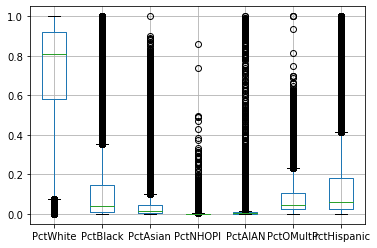

In [7]:

# Plot percentages to determine useful groups
demo_df.boxplot(column=['PctWhite','PctBlack','PctAsian','PctNHOPI','PctAIAN','PctOMultir','PctHispanic'])

In [8]:

demo_df.describe()

CensusTract       Pop2010         PctLA      PctWhite      PctBlack  \
count  7.253100e+04  72531.000000  72531.000000  72527.000000  72527.000000   
mean   2.782573e+10   4256.739022      0.212655      0.718700      0.138354   
std    1.581647e+10   1955.987626      0.309490      0.257003      0.222952   
min    1.001020e+09      1.000000      0.000000      0.000000      0.000000   
25%    1.212708e+10   2899.000000      0.000000      0.582829      0.010968   
50%    2.712979e+10   4011.000000      0.016757      0.808100      0.039901   
75%    4.103900e+10   5330.500000      0.354873      0.921795      0.148322   
max    5.604595e+10  37452.000000      1.000000      1.000000      1.000000   

           PctAsian      PctNHOPI       PctAIAN    PctOMultir   PctHispanic  
count  72527.000000  72527.000000  72527.000000  72527.000000  72527.000000  
mean       0.044031      0.001649      0.010171      0.087094      0.152714  
std        0.083982      0.010085      0.046881      0.100327      0.208271  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.004780      0.000000      0.001926      0.023313      0.024174  
50%        0.014722      0.000309      0.003859      0.047388      0.062069  
75%        0.043130      0.001063      0.007671      0.106071      0.180889  
max        1.000000      0.858824      1.000000      1.000000      1.000000

In [9]:

# Merge smallest minority groups
minority = demo_df['PctNHOPI']+demo_df['PctAIAN']+demo_df['PctOMultir']
demo_df['PctOtherMinority']= minority
demo_df = demo_df.drop(['PctNHOPI','PctAIAN','PctOMultir'], axis = 1)
demo_df.head()

CensusTract          County    State  Pop2010     PctLA  PctWhite  \
0   1001020100  Autauga County  Alabama     1912  0.991632  0.848326   
1   1001020200  Autauga County  Alabama     2170  0.581106  0.409217   
2   1001020300  Autauga County  Alabama     3373  0.460125  0.763712   
3   1001020400  Autauga County  Alabama     4386  0.310762  0.931601   
4   1001020500  Autauga County  Alabama    10766  0.245495  0.804941   

   PctBlack  PctAsian  PctHispanic  PctOtherMinority  
0  0.113494  0.007322     0.023013          0.030858  
1  0.560829  0.002304     0.034562          0.027650  
2  0.191817  0.005040     0.025793          0.039431  
3  0.044004  0.004104     0.019380          0.020292  
4  0.133476  0.027494     0.032974          0.034089

<AxesSubplot:>

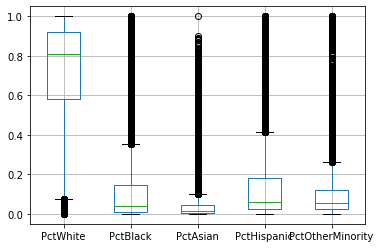

In [10]:
demo_df.boxplot(column=['PctWhite','PctBlack','PctAsian','PctHispanic','PctOtherMinority'])

In [11]:
data_df.to_csv("FoodAccess.csv", index=False)
demo_df.to_csv("FoodAccessDemographics_sc.csv", index=False)